* **k-평균** 알고리즘은 처음에 랜덤하게 클러스터 중심을 정하고 클러스터를 만든다. 그다음 클러스터의 중심을 이동하고 다시 클러스터를 만드는 식으로 반복해서 최적의 클러스터를 구성하는 알고리즘이다.
* **클러스터 중심**은 k-평균 알고리즘이 만든 클러스터에 속한 샘플의 특성 평균값이다. 센트로이드라고도 부른다. 가장 가까운 클러스터 중심을 샘플의 또 다른 특성으로 사용하거나 새로운 샘플에 대한 예측으로 활용할 수 있다.
* **엘보우 방법**은 최적의 클러스터 개수를 정하는 방법 중 하나이다. 이너셔는 클러스터 중심과 샘플 사이 거리의 제곱 합이다. 클러스터 개수에 따라 이너셔 감소가 꺾이는 지점이 적절한 클러스터 개수 k가 될 수 있다. 이 그래프의 모양을 따서 엘보우 방법이라고 부른다.

# scikit-learn

* **KMeans**는 k-평균 알고리즘 클래스이다.
  * n_clusters에는 클러스터 개수를 지정한다. 기본값은 8이다.
  * 처음에 랜덤하게 센트로이드를 초기화하기 때문에 여러 번 반복하여 이너셔를 기준으로 가장 좋은 결과를 선택한다. n_init은 이 반복 횟수를 지정한다. 기본값은 10이었으나, 사이킷런 버전 1.4에서는 'auto'로 변경될 예정이다.
  * max_iter는 k-평균 알고리즘의 한 번 실행에서 최적의 센트로이드를 찾기 위해 반복할 수 있는 최대 횟수이다. 기본값은 200이다.

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-10-28 13:53:49--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-10-28 13:53:49--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-10-28 13:53:50--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [5]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [7]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


In [8]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr) # 샘플의 개수

  # 한 줄에 10개씩 이미지 그림. 샘플 개수를 10으로 나누어 전체 행 개수 계산
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열의 개수는 샘플 개수. 그렇지 않으면 10개.
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
        axs[i, j].axis('off')

  plt.show()

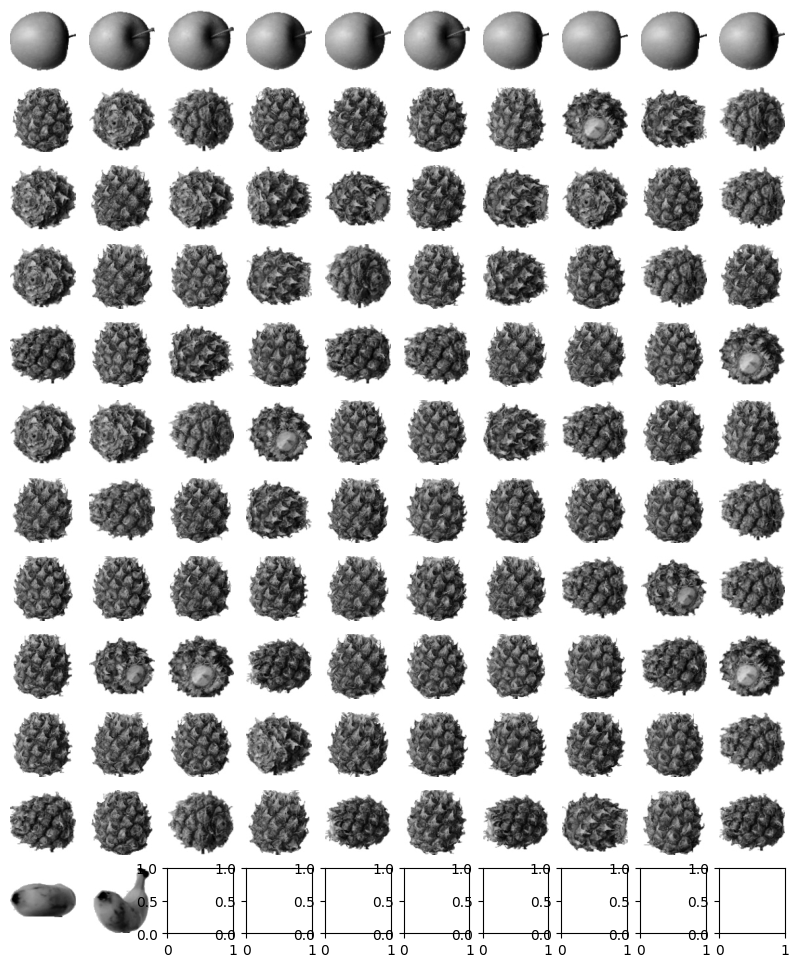

In [9]:
draw_fruits(fruits[km.labels_==0])

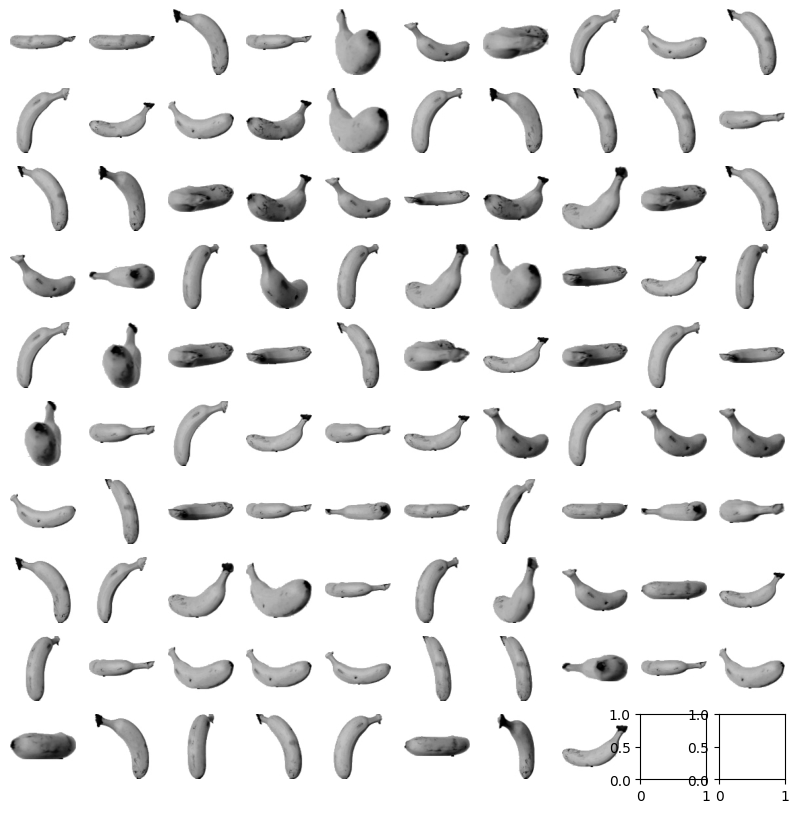

In [10]:
draw_fruits(fruits[km.labels_==1])

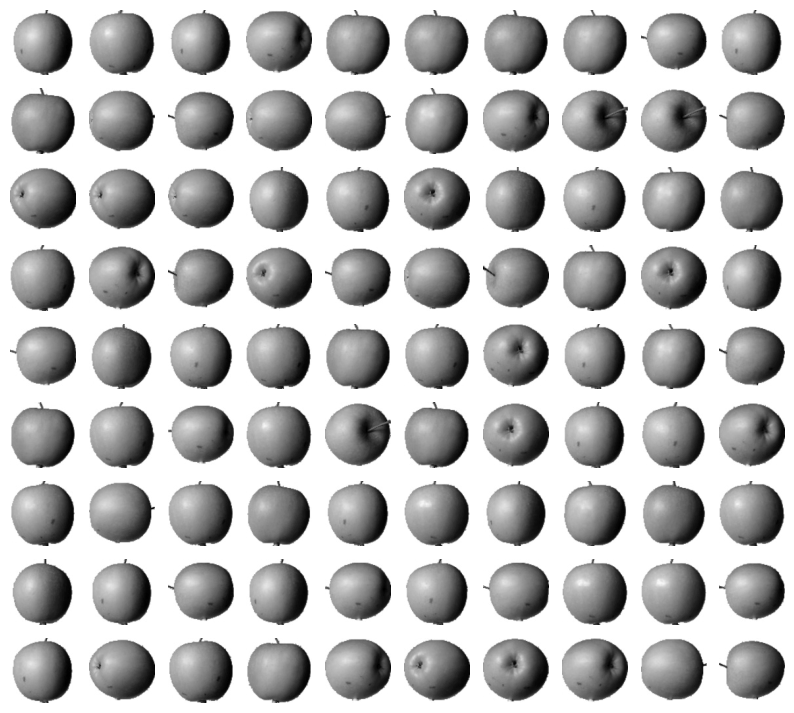

In [11]:
draw_fruits(fruits[km.labels_==2])

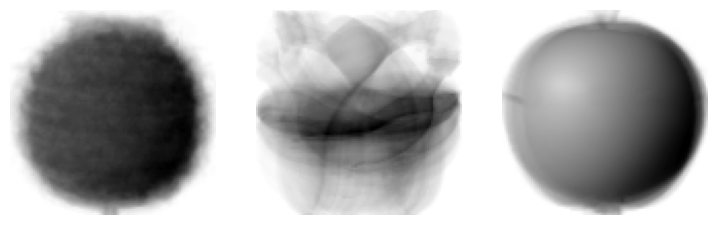

In [12]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [13]:
print(km.transform(fruits_2d[100:101]))

[[3400.24197319 8837.37750892 5279.33763699]]


In [14]:
print(km.predict(fruits_2d[100:101]))

[0]


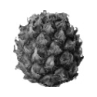

In [15]:
draw_fruits(fruits[100:101])

In [16]:
print(km.n_iter_)

4


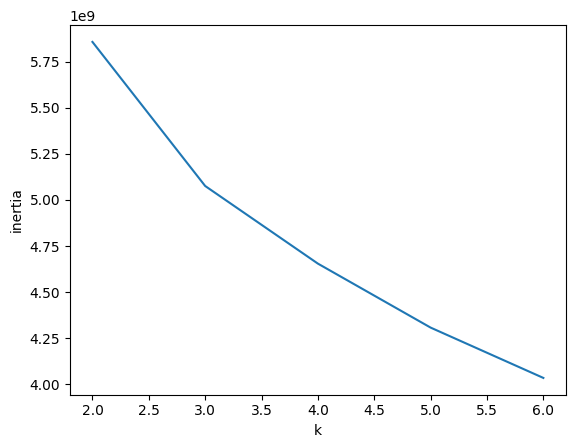

In [17]:
inertia = []

for k in range(2, 7):
  km = KMeans(n_clusters=k, n_init='auto', random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')

plt.show()